In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def normalize_loss(path1, path2):
    # Extract losses
    
    npz1 = np.load(path1)
    npz2 = np.load(path2)
    loss1 = npz1['losses']
    loss2 = npz2['losses']

    # Compute global min and max
    all_losses = np.concatenate([loss1, loss2])
    min_loss = all_losses.min()
    max_loss = all_losses.max()

    # Normalize
    norm1 = (loss1 - min_loss) / (max_loss - min_loss + 1e-8)
    norm2 = (loss2 - min_loss) / (max_loss - min_loss + 1e-8)

    # Build new paths
    out_path1 = os.path.splitext(path1)[0] + '_normalized.npz'
    out_path2 = os.path.splitext(path2)[0] + '_normalized.npz'

    # Save npz1 with normalized loss
    np.savez(out_path1, **{k: (norm1 if k == 'losses' else npz1[k]) for k in npz1.files})
    np.savez(out_path2, **{k: (norm2 if k == 'losses' else npz2[k]) for k in npz2.files})

    print(f"✅ Normalized files saved to:\n  {out_path1}\n  {out_path2}")
    print('max_loss ', max(norm1))
    print('max_loss ', max(norm2))
    
    return out_path1, out_path2

In [46]:


def compare_loss_distribution(losses_baseline_path, losses_ours_path, ood_label, threshold=None):
    # Load loss arrays from .npz
    losses_ours = np.load(losses_ours_path)["losses"]
    losses_baseline = np.load(losses_baseline_path)["losses"]

    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    # Histogram + KDE
    sns.histplot(losses_ours, bins=50, kde=True, stat="density", color="#ffb347", label="Ours", alpha=0.6)
    sns.histplot(losses_baseline, bins=50, kde=True, stat="density", color="#0000CD", label="Mixup", alpha=0.6)

    # Optional threshold line
    if threshold is not None:
        plt.axvline(threshold, color="gray", linestyle="--", linewidth=1)
        plt.text(threshold + 0.005, plt.ylim()[1] * 0.9, f"Threshold = {threshold}", rotation=90, color="gray")

    # Mean and Median lines
    for losses, color, name in zip(
        [losses_ours, losses_baseline],
        ["#ffb347", "#0000CD"],
        ["Ours", "Mixup"]
    ):
        mean = np.mean(losses)
        median = np.median(losses)
        plt.axvline(mean, linestyle="--", color=color, linewidth=1)
        plt.axvline(median, linestyle="-.", color=color, linewidth=1)
        plt.text(mean, plt.ylim()[1]*0.8, f"{name} Mean", color=color, rotation=90, fontsize=9)
        plt.text(median, plt.ylim()[1]*0.6, f"{name} Median", color=color, rotation=90, fontsize=9)

    plt.xlabel("Loss")
    plt.ylabel("Density")
    plt.title(f"OOD{ood_label} Loss Distribution")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"loss_distribution_ood{ood_label}.png", dpi=300)
    plt.close()
    


In [58]:
targets_baseline = ["'3a4'", "'cb1'"]
# targets_ours = ["'hivint'", "'tdi'"]

target_baseline_str = ", ".join(targets_baseline)
target_ours_str = ", ".join(targets_baseline)

ood1_baseline_path = f'/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL/lastlayer_ours_best_strans_nk1_bit_[{target_baseline_str}]_ood1_none.npz'
ood1_ours_path     = f'/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_[{target_ours_str}]_ood1_none.npz'

ood2_baseline_path = f'/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL/lastlayer_ours_best_strans_nk1_bit_[{target_baseline_str}]_ood2_none.npz'
ood2_ours_path     = f'/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_[{target_ours_str}]_ood2_none.npz'


In [59]:
ood1_path, ours_path1 = normalize_loss(ood1_baseline_path, ood1_ours_path)
ood2_path, ours_path2 = normalize_loss(ood2_baseline_path, ood2_ours_path)


✅ Normalized files saved to:
  /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL/lastlayer_ours_best_strans_nk1_bit_['3a4', 'cb1']_ood1_none_normalized.npz
  /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_normalized.npz
max_loss  1.0
max_loss  0.7389558
✅ Normalized files saved to:
  /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL/lastlayer_ours_best_strans_nk1_bit_['3a4', 'cb1']_ood2_none_normalized.npz
  /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood2_none_normalized.npz
max_loss  0.871223
max_loss  1.0


In [49]:


# compare_loss_distribution(ood1_path, ours_path1, 1)
# compare_loss_distribution(ood2_path, ours_path2, 2)

In [60]:
ood1 = np.load(ood1_path)
len(ood1['losses'])

3212

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def compare_loss_distribution_all(ood1_path, ours1_path, ood2_path, ours2_path, label="Combined OOD", threshold=None):
    # Load and concatenate losses
    ood1_losses = np.load(ood1_path)["losses"]
    ood2_losses = np.load(ood2_path)["losses"]
    ours1_losses = np.load(ours1_path)["losses"]
    ours2_losses = np.load(ours2_path)["losses"]

    losses_baseline = np.concatenate([ood1_losses, ood2_losses])
    losses_ours = np.concatenate([ours1_losses, ours2_losses])

    # Plot setup
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    # Histogram + KDE
    sns.histplot(losses_ours, bins=50, kde=True, stat="density", color="#ffb347", label="Ours", alpha=0.6)
    sns.histplot(losses_baseline, bins=50, kde=True, stat="density", color="#0000CD", label="Mixup", alpha=0.6)

    # Optional threshold line
    if threshold is not None:
        plt.axvline(threshold, color="gray", linestyle="--", linewidth=1)
        plt.text(threshold + 0.005, plt.ylim()[1] * 0.9, f"Threshold = {threshold}", rotation=90, color="gray")

    # Mean and Median lines
    for losses, color, name in zip(
        [losses_ours, losses_baseline],
        ["#ffb347", "#0000CD"],
        ["Ours", "Mixup"]
    ):
        mean = np.mean(losses)
        median = np.median(losses)
        plt.axvline(mean, linestyle="--", color=color, linewidth=1)
        plt.axvline(median, linestyle="-.", color=color, linewidth=1)
        plt.text(mean, plt.ylim()[1]*0.8, f"{name} Mean", color=color, rotation=90, fontsize=9)
        plt.text(median, plt.ylim()[1]*0.6, f"{name} Median", color=color, rotation=90, fontsize=9)

    plt.xlabel("Loss")
    plt.ylabel("Density")
    plt.title(f"{label} Loss Distribution (Combined)")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"loss_distribution_combined.png", dpi=300)
    plt.close()

    # --- Print Summary Statistics ---
    print(f"\n📊 Combined Loss Statistics — {label}")
    for name, losses in zip(["Ours", "Mixup"], [losses_ours, losses_baseline]):
        print(f"{name}:")
        print(f"  Mean   : {np.mean(losses):.6f}")
        print(f"  Median : {np.median(losses):.6f}")
        print(f"  StdDev : {np.std(losses):.6f}")
        if threshold is not None:
            pct_below = 100 * np.mean(losses < threshold)
            print(f"  % < {threshold:.3f} : {pct_below:.2f}%")


In [62]:
compare_loss_distribution_all(ood1_path, ours_path1, ood2_path, ours_path2)


📊 Combined Loss Statistics — Combined OOD
Ours:
  Mean   : 0.094557
  Median : 0.063352
  StdDev : 0.106601
Mixup:
  Mean   : 0.079045
  Median : 0.040036
  StdDev : 0.095330


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# --- Set folders ---
ours_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST"
mixup_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL"


def extract_match_key(filename):
    parts = filename.split("_")
    ood_part = [p for p in parts if "ood" in p]
    if len(parts) >= 6 and ood_part:
        prefix = "_".join(parts[:6])
        ood = ood_part[0]  # ood1 or ood2
        return f"{prefix}_{ood}"
    return None

# --- Group all files under folders ---
def group_files_by_key(folder):
    grouped = defaultdict(list)
    for f in os.listdir(folder):
        if f.endswith(".npz"):
            key = extract_match_key(f)
            if key:
                grouped[key].append(os.path.join(folder, f))
    return grouped

print("\n🧪 Keys in ours_grouped:")
for fname in os.listdir(ours_dir):
    if fname.endswith(".npz"):
        key = extract_match_key(fname)
        print(f"{fname}  -->  {key}")



🧪 Keys in ours_grouped:
lastlayer_ours_best_dsets_nk1_count_['3a4', 'metab']_ood2_none.npz  -->  lastlayer_ours_best_dsets_nk1_count_ood2
lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none.npz  -->  lastlayer_ours_best_dsets_nk1_bit_ood1
lastlayer_ours_best_dsets_hivprot_bit_['metab', 'pgp']_ood1_none.npz  -->  lastlayer_ours_best_dsets_hivprot_bit_ood1
lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood2_none.npz  -->  lastlayer_ours_best_dsets_nk1_bit_ood2
lastlayer_ours_best_dsets_hivprot_bit_['metab', 'pgp']_ood2_none.npz  -->  lastlayer_ours_best_dsets_hivprot_bit_ood2
lastlayer_ours_best_dsets_dpp4_bit_['ox1', 'ppb']_ood1_none.npz  -->  lastlayer_ours_best_dsets_dpp4_bit_ood1
lastlayer_ours_best_dsets_dpp4_count_['hivint', 'rat_f']_ood2_none.npz  -->  lastlayer_ours_best_dsets_dpp4_count_ood2
lastlayer_ours_best_dsets_hivprot_count_['3a4', 'metab']_ood1_none.npz  -->  lastlayer_ours_best_dsets_hivprot_count_ood1
lastlayer_ours_best_dsets_dpp4_bit_['ox1', 'ppb']_ood2_non

In [7]:
ours_grouped = group_files_by_key(ours_dir)
mixup_grouped = group_files_by_key(mixup_dir)

print("✅ Keys in ours_grouped:", list(ours_grouped.keys())[:5])
print("✅ Keys in mixup_grouped:", list(mixup_grouped.keys())[:5])


✅ Keys in ours_grouped: ['lastlayer_ours_best_dsets_nk1_count_ood2', 'lastlayer_ours_best_dsets_nk1_bit_ood1', 'lastlayer_ours_best_dsets_hivprot_bit_ood1', 'lastlayer_ours_best_dsets_nk1_bit_ood2', 'lastlayer_ours_best_dsets_hivprot_bit_ood2']
✅ Keys in mixup_grouped: ['lastlayer_ours_best_strans_nk1_count_ood1', 'lastlayer_ours_best_strans_nk1_bit_ood2', 'lastlayer_ours_best_strans_nk1_bit_ood1', 'lastlayer_ours_best_strans_nk1_count_ood2', 'lastlayer_ours_best_strans_dpp4_bit_ood2']


In [1]:



# --- Helper: extract key (first 6 parts + ood1/ood2) ---


# --- Normalize two arrays jointly ---
def normalize_joint_pair(path1, path2):
    data1 = np.load(path1)["losses"]
    data2 = np.load(path2)["losses"]
    combined = np.concatenate([data1, data2])
    min_val, max_val = combined.min(), combined.max()
    norm1 = (data1 - min_val) / (max_val - min_val + 1e-8)
    norm2 = (data2 - min_val) / (max_val - min_val + 1e-8)
    return norm1, norm2

# --- Compare + plot ---
def compare_loss_distribution_from_arrays(losses_ours, losses_mixup, ood_label, threshold=None):
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    sns.histplot(losses_ours, bins=50, kde=True, stat="density", color="#ffb347", label="Ours", alpha=0.6)
    sns.histplot(losses_mixup, bins=50, kde=True, stat="density", color="#0000CD", label="Mixup", alpha=0.6)

    if threshold is not None:
        plt.axvline(threshold, color="gray", linestyle="--", linewidth=1)
        plt.text(threshold + 0.005, plt.ylim()[1] * 0.9, f"Threshold = {threshold}", rotation=90, color="gray")

    for losses, color, name in zip([losses_ours, losses_mixup], ["#ffb347", "#0000CD"], ["Ours", "Mixup"]):
        mean = np.mean(losses)
        median = np.median(losses)
        plt.axvline(mean, linestyle="--", color=color, linewidth=1)
        plt.axvline(median, linestyle="-.", color=color, linewidth=1)
        plt.text(mean, plt.ylim()[1]*0.8, f"{name} Mean", color=color, rotation=90, fontsize=9)
        plt.text(median, plt.ylim()[1]*0.6, f"{name} Median", color=color, rotation=90, fontsize=9)

    plt.xlabel("Normalized Loss")
    plt.ylabel("Density")
    plt.title(f"OOD{ood_label} Loss Distribution (Joint File Normalization)")
    plt.legend()
    plt.tight_layout()

    save_path = f"loss_distribution_ood{ood_label}_jointfile.png"
    plt.savefig(save_path, dpi=300)
    print(f"📁 Saved figure to: {os.path.abspath(save_path)}")
    plt.close()

# --- Main Logic ---


# Per-OOD containers
ood1_ours_all, ood1_mixup_all = [], []
ood2_ours_all, ood2_mixup_all = [], []

for key in ours_grouped:
    if key in mixup_grouped:
        ours_path = ours_grouped[key][0]
        mixup_path = mixup_grouped[key][0]

        norm_ours, norm_mixup = normalize_joint_pair(ours_path, mixup_path)

        if "ood1" in key:
            ood1_ours_all.append(norm_ours)
            ood1_mixup_all.append(norm_mixup)
        elif "ood2" in key:
            ood2_ours_all.append(norm_ours)
            ood2_mixup_all.append(norm_mixup)

        print(f"✅ Normalized pair: {os.path.basename(ours_path)} & {os.path.basename(mixup_path)}")

# --- Concatenate and plot ---

print(ood1_ours_all)
ood1_ours_all = np.concatenate(ood1_ours_all)
ood1_mixup_all = np.concatenate(ood1_mixup_all)
ood2_ours_all = np.concatenate(ood2_ours_all)
ood2_mixup_all = np.concatenate(ood2_mixup_all)

print("\n🎯 All normalization complete.")
compare_loss_distribution_from_arrays(ood1_ours_all, ood1_mixup_all, ood_label=1)
compare_loss_distribution_from_arrays(ood2_ours_all, ood2_mixup_all, ood_label=2)


[]


ValueError: need at least one array to concatenate

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# --- Set folders ---
ours_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST"
mixup_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL"

# --- Extract key like nk1_bit_500_10_ood1 ---
def extract_nk1_key(filename):
    parts = filename.split("_")
    for i in range(len(parts) - 3):
        if parts[i] == "nk1" and parts[i + 1] == "bit":
            return "_".join(parts[i:i+4])  # e.g. nk1_bit_500_10_ood2
    return None

# --- Group files by nk1_key ---
def group_files_by_nk1(folder):
    grouped = defaultdict(list)
    for f in os.listdir(folder):
        if f.endswith(".npz"):
            key = extract_nk1_key(f)
            if key:
                grouped[key].append(os.path.join(folder, f))
    return grouped

# --- Normalize two arrays jointly ---
def normalize_joint_pair(path1, path2):
    data1 = np.load(path1)["losses"]
    data2 = np.load(path2)["losses"]
    combined = np.concatenate([data1, data2])
    min_val, max_val = combined.min(), combined.max()
    norm1 = (data1 - min_val) / (max_val - min_val + 1e-8)
    norm2 = (data2 - min_val) / (max_val - min_val + 1e-8)
    return norm1, norm2

# --- Compare + plot ---
def compare_loss_distribution_from_arrays(losses_ours, losses_mixup, ood_label, threshold=None):
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    sns.histplot(losses_ours, bins=50, kde=True, stat="density", color="#ffb347", label="Ours", alpha=0.6)
    sns.histplot(losses_mixup, bins=50, kde=True, stat="density", color="#0000CD", label="Mixup", alpha=0.6)

    if threshold is not None:
        plt.axvline(threshold, color="gray", linestyle="--", linewidth=1)
        plt.text(threshold + 0.005, plt.ylim()[1] * 0.9, f"Threshold = {threshold}", rotation=90, color="gray")

    for losses, color, name in zip([losses_ours, losses_mixup], ["#ffb347", "#0000CD"], ["Ours", "Mixup"]):
        mean = np.mean(losses)
        median = np.median(losses)
        plt.axvline(mean, linestyle="--", color=color, linewidth=1)
        plt.axvline(median, linestyle="-.", color=color, linewidth=1)
        plt.text(mean, plt.ylim()[1]*0.8, f"{name} Mean", color=color, rotation=90, fontsize=9)
        plt.text(median, plt.ylim()[1]*0.6, f"{name} Median", color=color, rotation=90, fontsize=9)

    plt.xlabel("Normalized Loss")
    plt.ylabel("Density")
    plt.title(f"OOD{ood_label} Loss Distribution (nk1_key Matched)")
    plt.legend()
    plt.tight_layout()

    save_path = f"loss_distribution_ood{ood_label}_nk1key.png"
    plt.savefig(save_path, dpi=300)
    print(f"📁 Saved figure to: {os.path.abspath(save_path)}")
    plt.close()

# --- Main Logic ---
ours_grouped = group_files_by_nk1(ours_dir)
mixup_grouped = group_files_by_nk1(mixup_dir)

ood1_ours_all, ood1_mixup_all = [], []
ood2_ours_all, ood2_mixup_all = [], []

# Match and normalize
for nk1_key in ours_grouped:
    if nk1_key in mixup_grouped:
        ours_path = ours_grouped[nk1_key][0]
        mixup_path = mixup_grouped[nk1_key][0]

        norm_ours, norm_mixup = normalize_joint_pair(ours_path, mixup_path)

        if "ood1" in nk1_key:
            ood1_ours_all.append(norm_ours)
            ood1_mixup_all.append(norm_mixup)
        elif "ood2" in nk1_key:
            ood2_ours_all.append(norm_ours)
            ood2_mixup_all.append(norm_mixup)

        print(f"✅ Normalized pair: {os.path.basename(ours_path)} & {os.path.basename(mixup_path)}")

# --- Concatenate and plot ---
ood1_ours_all = np.concatenate(ood1_ours_all)
ood1_mixup_all = np.concatenate(ood1_mixup_all)
ood2_ours_all = np.concatenate(ood2_ours_all)
ood2_mixup_all = np.concatenate(ood2_mixup_all)

print("\n🎯 Normalization complete for all matched nk1 groups.")
compare_loss_distribution_from_arrays(ood1_ours_all, ood1_mixup_all, ood_label=1)
compare_loss_distribution_from_arrays(ood2_ours_all, ood2_mixup_all, ood_label=2)


✅ Normalized pair: lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none.npz & lastlayer_ours_best_strans_nk1_bit_['3a4', 'cb1']_ood1_none.npz
✅ Normalized pair: lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood2_none.npz & lastlayer_ours_best_strans_nk1_bit_['3a4', 'cb1']_ood2_none.npz

🎯 Normalization complete for all matched nk1 groups.
📁 Saved figure to: /c2/jinakim/Drug_Discovery_j/loss_distribution_ood1_nk1key.png
📁 Saved figure to: /c2/jinakim/Drug_Discovery_j/loss_distribution_ood2_nk1key.png


In [10]:
mixup_grouped

defaultdict(list,
            {"nk1_bit_['3a4', 'cb1']_ood2": ["/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL/lastlayer_ours_best_strans_nk1_bit_['3a4', 'cb1']_ood2_none.npz"],
             "nk1_bit_['3a4', 'cb1']_ood1": ["/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL/lastlayer_ours_best_strans_nk1_bit_['3a4', 'cb1']_ood1_none.npz"]})

In [ ]:
ours_grouped

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# --- Directories ---
ours_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST"
mixup_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL"

# --- Define 12 target keys ---
TARGET_KEYS = [
    f"{drug}_{mode}_ood{n}"
    for drug in ["hivprot", "dpp4", "nk1"]
    for mode in ["count", "bit"]
    for n in [1, 2]
]

# --- Extract key from filename ---
def extract_group_key(filename):
    for key in TARGET_KEYS:
        if key in filename:
            return key
    return None

# --- Group by group_key ---
def group_by_target_keys(folder):
    grouped = defaultdict(list)
    for f in os.listdir(folder):
        if f.endswith(".npz"):
            key = extract_group_key(f)
            if key:
                grouped[key].append(os.path.join(folder, f))
    return grouped

# --- Joint normalize ---
def normalize_joint_pair(path1, path2):
    data1 = np.load(path1)["losses"]
    data2 = np.load(path2)["losses"]
    combined = np.concatenate([data1, data2])
    min_val, max_val = combined.min(), combined.max()
    norm1 = (data1 - min_val) / (max_val - min_val + 1e-8)
    norm2 = (data2 - min_val) / (max_val - min_val + 1e-8)
    return norm1, norm2

# --- Plotting ---
def compare_loss_distribution_from_arrays(losses_ours, losses_mixup, ood_label):
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    sns.histplot(losses_ours, bins=50, kde=True, stat="density", color="#ffb347", label="Ours", alpha=0.6)
    sns.histplot(losses_mixup, bins=50, kde=True, stat="density", color="#0000CD", label="Mixup", alpha=0.6)

    for losses, color, name in zip([losses_ours, losses_mixup], ["#ffb347", "#0000CD"], ["Ours", "Mixup"]):
        mean = np.mean(losses)
        median = np.median(losses)
        plt.axvline(mean, linestyle="--", color=color, linewidth=1)
        plt.axvline(median, linestyle="-.", color=color, linewidth=1)
        plt.text(mean, plt.ylim()[1]*0.8, f"{name} Mean", color=color, rotation=90, fontsize=9)
        plt.text(median, plt.ylim()[1]*0.6, f"{name} Median", color=color, rotation=90, fontsize=9)

    plt.xlabel("Normalized Loss")
    plt.ylabel("Density")
    plt.title(f"OOD{ood_label} Loss Distribution (Grouped by 12 keys)")
    plt.legend()
    plt.tight_layout()

    save_path = f"loss_distribution_ood{ood_label}_12keygrouped.png"
    plt.savefig(save_path, dpi=300)
    print(f"📁 Saved figure to: {os.path.abspath(save_path)}")
    plt.close()

# --- Main Logic ---
ours_grouped = group_by_target_keys(ours_dir)
mixup_grouped = group_by_target_keys(mixup_dir)

ood1_ours_all, ood1_mixup_all = [], []
ood2_ours_all, ood2_mixup_all = [], []

for key in TARGET_KEYS:
    if key in ours_grouped and key in mixup_grouped:
        ours_path = ours_grouped[key][0]
        mixup_path = mixup_grouped[key][0]

        norm_ours, norm_mixup = normalize_joint_pair(ours_path, mixup_path)

        if "ood1" in key:
            ood1_ours_all.append(norm_ours)
            ood1_mixup_all.append(norm_mixup)
        elif "ood2" in key:
            ood2_ours_all.append(norm_ours)
            ood2_mixup_all.append(norm_mixup)

        print(f"✅ Normalized: {key}")
    else:
        print(f"❌ Missing pair for: {key}")

# --- Plot per OOD group ---
if ood1_ours_all and ood1_mixup_all:
    compare_loss_distribution_from_arrays(np.concatenate(ood1_ours_all),
                                          np.concatenate(ood1_mixup_all),
                                          ood_label=1)

if ood2_ours_all and ood2_mixup_all:
    compare_loss_distribution_from_arrays(np.concatenate(ood2_ours_all),
                                          np.concatenate(ood2_mixup_all),
                                          ood_label=2)


❌ Missing pair for: hivprot_count_ood1
❌ Missing pair for: hivprot_count_ood2
❌ Missing pair for: hivprot_bit_ood1
❌ Missing pair for: hivprot_bit_ood2
❌ Missing pair for: dpp4_count_ood1
❌ Missing pair for: dpp4_count_ood2
❌ Missing pair for: dpp4_bit_ood1
❌ Missing pair for: dpp4_bit_ood2
❌ Missing pair for: nk1_count_ood1
❌ Missing pair for: nk1_count_ood2
❌ Missing pair for: nk1_bit_ood1
❌ Missing pair for: nk1_bit_ood2


In [15]:
ours_grouped

defaultdict(list, {})

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# --- Input folders ---
ours_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST"
mixup_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL"

# --- Drugs, modes, ood types ---
DRUGS = ["dpp4", "hivprot", "nk1"]
MODES = ["bit", "count"]
OODS = ["ood1", "ood2"]

# --- All 12 valid keys ---
VALID_KEYS = [f"{drug}_{mode}_{ood}" for drug in DRUGS for mode in MODES for ood in OODS]

# --- Extract match key from filename ---
def extract_key_from_filename(filename):
    for drug in DRUGS:
        for mode in MODES:
            for ood in OODS:
                pattern = f"_{drug}_{mode}_"
                if pattern in filename and f"_{ood}" in filename:
                    return f"{drug}_{mode}_{ood}"
    return None

# --- Group files by match key ---
def group_files(folder):
    grouped = defaultdict(list)
    for fname in os.listdir(folder):
        if fname.endswith(".npz"):
            key = extract_key_from_filename(fname)
            if key:
                grouped[key].append(os.path.join(folder, fname))
    return grouped

# --- Normalize losses from two files jointly ---
def normalize_joint_pair(path1, path2):
    data1 = np.load(path1)["losses"]
    data2 = np.load(path2)["losses"]
    combined = np.concatenate([data1, data2])
    min_val, max_val = combined.min(), combined.max()
    norm1 = (data1 - min_val) / (max_val - min_val + 1e-8)
    norm2 = (data2 - min_val) / (max_val - min_val + 1e-8)
    return norm1, norm2

# --- Plotting ---
def compare_loss_distribution_from_arrays(losses_ours, losses_mixup, ood_label):
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    sns.histplot(losses_ours, bins=50, kde=True, stat="density", color="#ffb347", label="Ours", alpha=0.6)
    sns.histplot(losses_mixup, bins=50, kde=True, stat="density", color="#0000CD", label="Mixup", alpha=0.6)

    for losses, color, name in zip([losses_ours, losses_mixup], ["#ffb347", "#0000CD"], ["Ours", "Mixup"]):
        mean = np.mean(losses)
        median = np.median(losses)
        plt.axvline(mean, linestyle="--", color=color, linewidth=1)
        plt.axvline(median, linestyle="-.", color=color, linewidth=1)
        plt.text(mean, plt.ylim()[1]*0.8, f"{name} Mean", color=color, rotation=90, fontsize=9)
        plt.text(median, plt.ylim()[1]*0.6, f"{name} Median", color=color, rotation=90, fontsize=9)

    plt.xlabel("Normalized Loss")
    plt.ylabel("Density")
    plt.title(f"OOD{ood_label} Loss Distribution (Matched by true filename)")
    plt.legend()
    plt.tight_layout()

    save_path = f"loss_distribution_ood{ood_label}_realfilename.png"
    plt.savefig(save_path, dpi=300)
    print(f"📁 Saved figure to: {os.path.abspath(save_path)}")
    plt.close()

# --- Main Logic ---
ours_grouped = group_files(ours_dir)
mixup_grouped = group_files(mixup_dir)

ood1_ours_all, ood1_mixup_all = [], []
ood2_ours_all, ood2_mixup_all = [], []

for key in VALID_KEYS:
    if key in ours_grouped and key in mixup_grouped:
        ours_path = ours_grouped[key][0]
        mixup_path = mixup_grouped[key][0]

        norm_ours, norm_mixup = normalize_joint_pair(ours_path, mixup_path)

        if "ood1" in key:
            ood1_ours_all.append(norm_ours)
            ood1_mixup_all.append(norm_mixup)
        elif "ood2" in key:
            ood2_ours_all.append(norm_ours)
            ood2_mixup_all.append(norm_mixup)

        print(f"✅ Matched and normalized: {key}")
    else:
        print(f"❌ No match for key: {key}")

# --- Plot combined per OOD group ---
if ood1_ours_all and ood1_mixup_all:
    compare_loss_distribution_from_arrays(np.concatenate(ood1_ours_all), np.concatenate(ood1_mixup_all), ood_label=1)

if ood2_ours_all and ood2_mixup_all:
    compare_loss_distribution_from_arrays(np.concatenate(ood2_ours_all), np.concatenate(ood2_mixup_all), ood_label=2)


✅ Matched and normalized: dpp4_bit_ood1
✅ Matched and normalized: dpp4_bit_ood2
✅ Matched and normalized: dpp4_count_ood1
✅ Matched and normalized: dpp4_count_ood2
✅ Matched and normalized: hivprot_bit_ood1
✅ Matched and normalized: hivprot_bit_ood2
✅ Matched and normalized: hivprot_count_ood1
✅ Matched and normalized: hivprot_count_ood2
✅ Matched and normalized: nk1_bit_ood1
✅ Matched and normalized: nk1_bit_ood2
✅ Matched and normalized: nk1_count_ood1
✅ Matched and normalized: nk1_count_ood2
📁 Saved figure to: /c2/jinakim/Drug_Discovery_j/loss_distribution_ood1_realfilename.png
📁 Saved figure to: /c2/jinakim/Drug_Discovery_j/loss_distribution_ood2_realfilename.png


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# --- Input folders ---
ours_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST"
mixup_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL"

# --- Supported keys ---
DRUGS = ["dpp4", "hivprot", "nk1"]
MODES = ["bit", "count"]
OODS = ["ood1", "ood2"]
VALID_KEYS = [f"{drug}_{mode}_{ood}" for drug in DRUGS for mode in MODES for ood in OODS]

# --- Extract match key from filename ---
def extract_key_from_filename(filename):
    for drug in DRUGS:
        for mode in MODES:
            for ood in OODS:
                if f"_{drug}_{mode}_" in filename and f"_{ood}" in filename:
                    return f"{drug}_{mode}_{ood}"
    return None

# --- Group files ---
def group_files(folder):
    grouped = defaultdict(list)
    for fname in os.listdir(folder):
        if fname.endswith(".npz"):
            key = extract_key_from_filename(fname)
            if key:
                grouped[key].append(os.path.join(folder, fname))
    return grouped

# --- Normalize losses from two files jointly ---
def normalize_joint_pair(path1, path2):
    data1 = np.load(path1)["losses"]
    data2 = np.load(path2)["losses"]
    combined = np.concatenate([data1, data2])
    min_val, max_val = combined.min(), combined.max()
    norm1 = (data1 - min_val) / (max_val - min_val + 1e-8)
    norm2 = (data2 - min_val) / (max_val - min_val + 1e-8)
    return norm1, norm2

# --- Plot per pair ---
def compare_loss_distribution_from_arrays(losses_ours, losses_mixup, key):
    ood_label = "1" if "ood1" in key else "2"

    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    sns.histplot(losses_ours, bins=50, kde=True, stat="density", color="#ffb347", label="Ours", alpha=0.6)
    sns.histplot(losses_mixup, bins=50, kde=True, stat="density", color="#0000CD", label="Mixup", alpha=0.6)

    for losses, color, name in zip([losses_ours, losses_mixup], ["#ffb347", "#0000CD"], ["Ours", "Mixup"]):
        mean = np.mean(losses)
        median = np.median(losses)
        plt.axvline(mean, linestyle="--", color=color, linewidth=1)
        plt.axvline(median, linestyle="-.", color=color, linewidth=1)
        plt.text(mean, plt.ylim()[1]*0.8, f"{name} Mean", color=color, rotation=90, fontsize=9)
        plt.text(median, plt.ylim()[1]*0.6, f"{name} Median", color=color, rotation=90, fontsize=9)

    plt.xlabel("Normalized Loss")
    plt.ylabel("Density")
    plt.title(f"{key}: Loss Distribution (Normalized)")
    plt.legend()
    plt.tight_layout()

    fname = f"loss_distribution_{key}.png"
    plt.savefig(fname, dpi=300)
    print(f"📁 Saved: {os.path.abspath(fname)}")
    plt.close()

# --- Main Logic ---
ours_grouped = group_files(ours_dir)
mixup_grouped = group_files(mixup_dir)

# --- Plot per matched key ---
for key in VALID_KEYS:
    if key in ours_grouped and key in mixup_grouped:
        ours_path = ours_grouped[key][0]
        mixup_path = mixup_grouped[key][0]

        norm_ours, norm_mixup = normalize_joint_pair(ours_path, mixup_path)

        compare_loss_distribution_from_arrays(norm_ours, norm_mixup, key)
    else:
        print(f"❌ Missing match for: {key}")


❌ Missing match for: dpp4_bit_ood1
❌ Missing match for: dpp4_bit_ood2
❌ Missing match for: dpp4_count_ood1
❌ Missing match for: dpp4_count_ood2
❌ Missing match for: hivprot_bit_ood1
❌ Missing match for: hivprot_bit_ood2
❌ Missing match for: hivprot_count_ood1
❌ Missing match for: hivprot_count_ood2
📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1.png
📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood2.png
❌ Missing match for: nk1_count_ood1
❌ Missing match for: nk1_count_ood2


In [27]:
# --- Collect all for final global comparison ---
all_ours, all_mixup = [], []

for key in VALID_KEYS:
    if key in ours_grouped and key in mixup_grouped:
        ours_path = ours_grouped[key][0]
        mixup_path = mixup_grouped[key][0]

        norm_ours, norm_mixup = normalize_joint_pair(ours_path, mixup_path)

        all_ours.append(norm_ours)
        all_mixup.append(norm_mixup)

# --- Concatenate ---
if all_ours and all_mixup:
    all_ours = np.concatenate(all_ours)
    all_mixup = np.concatenate(all_mixup)

    # --- Final aggregated plot ---
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    sns.histplot(all_ours, bins=50, kde=True, stat="density", color="#ffb347", label="Ours", alpha=0.6)
    sns.histplot(all_mixup, bins=50, kde=True, stat="density", color="#0000CD", label="Mixup", alpha=0.6)

    for losses, color, name in zip([all_ours, all_mixup], ["#ffb347", "#0000CD"], ["Ours", "Mixup"]):
        mean = np.mean(losses)
        median = np.median(losses)
        plt.axvline(mean, linestyle="--", color=color, linewidth=1)
        plt.axvline(median, linestyle="-.", color=color, linewidth=1)
        plt.text(mean, plt.ylim()[1]*0.8, f"{name} Mean", color=color, rotation=90, fontsize=9)
        plt.text(median, plt.ylim()[1]*0.6, f"{name} Median", color=color, rotation=90, fontsize=9)

    plt.xlabel("Normalized Loss")
    plt.ylabel("Density")
    plt.title("Aggregated Loss Distribution (All Matched Pairs)")
    plt.legend()
    plt.tight_layout()

    fname = "loss_distribution_all_matched.png"
    plt.savefig(fname, dpi=300)
    print(f"📁 Saved combined plot: {os.path.abspath(fname)}")
    plt.close()
else:
    print("⚠️ No matched files found for global comparison.")


📁 Saved combined plot: /c2/jinakim/Drug_Discovery_j/loss_distribution_all_matched.png


In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# --- Input folders ---
ours_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST"
mixup_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL"

# --- Supported keys ---
DRUGS = ["dpp4", "hivprot", "nk1"]
MODES = ["bit", "count"]
OODS = ["ood1", "ood2"]
VALID_KEYS = [f"{drug}_{mode}_{ood}" for drug in DRUGS for mode in MODES for ood in OODS]

# --- Extract match key from filename ---
def extract_key_from_filename(filename):
    for drug in DRUGS:
        for mode in MODES:
            for ood in OODS:
                if f"_{drug}_{mode}_" in filename and f"_{ood}" in filename:
                    return f"{drug}_{mode}_{ood}"
    return None

# --- Group files ---
def group_files(folder):
    grouped = defaultdict(list)
    for fname in os.listdir(folder):
        if fname.endswith(".npz"):
            key = extract_key_from_filename(fname)
            if key:
                grouped[key].append(os.path.join(folder, fname))
    return grouped

# --- Normalize two arrays together ---
def normalize_combined(arr1, arr2):
    combined = np.concatenate([arr1, arr2])
    min_val, max_val = combined.min(), combined.max()
    norm1 = (arr1 - min_val) / (max_val - min_val + 1e-8)
    norm2 = (arr2 - min_val) / (max_val - min_val + 1e-8)
    return norm1, norm2

# --- Plot all together ---
def compare_total_loss_distribution(losses_ours, losses_mixup):
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    sns.histplot(losses_ours, bins=50, kde=True, stat="density", color="#ffb347", label="Ours", alpha=0.6)
    sns.histplot(losses_mixup, bins=50, kde=True, stat="density", color="#0000CD", label="Mixup", alpha=0.6)

    for losses, color, name in zip([losses_ours, losses_mixup], ["#ffb347", "#0000CD"], ["Ours", "Mixup"]):
        mean = np.mean(losses)
        median = np.median(losses)
        plt.axvline(mean, linestyle="--", color=color, linewidth=1)
        plt.axvline(median, linestyle="-.", color=color, linewidth=1)
        plt.text(mean, plt.ylim()[1]*0.8, f"{name} Mean", color=color, rotation=90, fontsize=9)
        plt.text(median, plt.ylim()[1]*0.6, f"{name} Median", color=color, rotation=90, fontsize=9)

    plt.xlabel("Normalized Loss")
    plt.ylabel("Density")
    plt.title("Combined Normalized Loss Distribution")
    plt.legend()
    plt.tight_layout()

    fname = "loss_distribution_combined_all.png"
    plt.savefig(fname, dpi=300)
    print(f"📁 Saved final combined plot: {os.path.abspath(fname)}")
    plt.close()

# --- Main Logic ---
ours_grouped = group_files(ours_dir)
mixup_grouped = group_files(mixup_dir)

ours_loss_all = []
mixup_loss_all = []

for key in VALID_KEYS:
    if key in ours_grouped and key in mixup_grouped:
        ours_path = ours_grouped[key][0]
        mixup_path = mixup_grouped[key][0]

        data_ours = np.load(ours_path)["losses"]
        data_mixup = np.load(mixup_path)["losses"]

        ours_loss_all.append(data_ours)
        mixup_loss_all.append(data_mixup)
    else:
        print(f"❌ Missing match for: {key}")

# --- Normalize and plot final aggregate ---
if ours_loss_all and mixup_loss_all:
    all_ours = np.concatenate(ours_loss_all)
    all_mixup = np.concatenate(mixup_loss_all)

    norm_ours, norm_mixup = normalize_combined(all_ours, all_mixup)

    compare_total_loss_distribution(norm_ours, norm_mixup)
else:
    print("⚠️ No matched pairs found for final aggregation.")


📁 Saved final combined plot: /c2/jinakim/Drug_Discovery_j/loss_distribution_combined_all.png


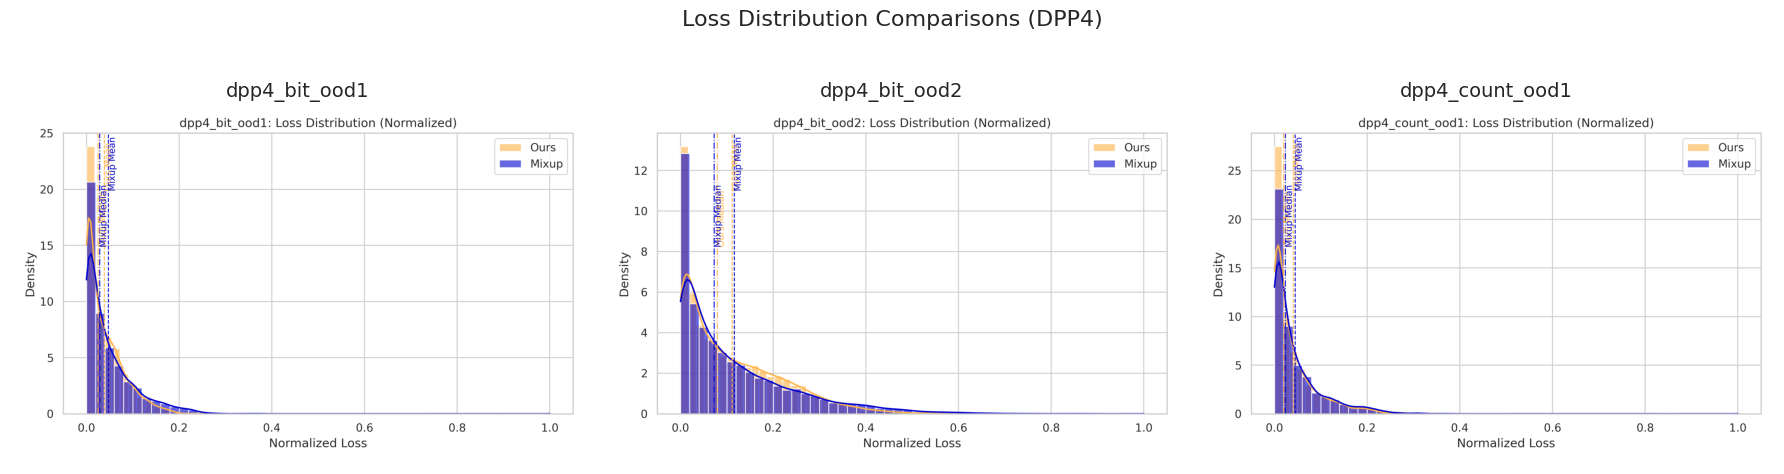

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def compare_total_loss_distribution():
    base_dir = "/c2/jinakim/Drug_Discovery_j"
    files = [
        "loss_distribution_dpp4_bit_ood1.png",
        "loss_distribution_dpp4_bit_ood2.png",
        "loss_distribution_dpp4_count_ood1.png",
    ]
    titles = [
        "dpp4_bit_ood1",
        "dpp4_bit_ood2",
        "dpp4_count_ood1",
    ]

    plt.figure(figsize=(18, 5))

    for i, (filename, title) in enumerate(zip(files, titles)):
        path = os.path.join(base_dir, filename)
        img = mpimg.imread(path)
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(title, fontsize=14)

    plt.tight_layout()
    plt.suptitle("Loss Distribution Comparisons (DPP4)", fontsize=16, y=1.05)
    plt.show()
    
compare_total_loss_distribution()


In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def normalize_joint(arr1, arr2):
    combined = np.concatenate([arr1, arr2])
    min_val, max_val = combined.min(), combined.max()
    norm1 = (arr1 - min_val) / (max_val - min_val + 1e-8)
    norm2 = (arr2 - min_val) / (max_val - min_val + 1e-8)
    return norm1, norm2

def plot_combined_distribution_dpp4_bit():
    base_dir_ours = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST"
    base_dir_mixup = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL"

    # Corresponding .npz file names
    ours_files = [
        "lastlayer_ours_best_dsets_dpp4_bit_['3a4', 'cb1']_ood1_none.npz",
        "lastlayer_ours_best_dsets_dpp4_bit_['3a4', 'cb1']_ood2_none.npz"
    ]
    mixup_files = [
        "lastlayer_ours_best_strans_dpp4_bit_['3a4', 'cb1']_ood1_none.npz",
        "lastlayer_ours_best_strans_dpp4_bit_['3a4', 'cb1']_ood2_none.npz"
    ]

    ours_losses, mixup_losses = [], []

    for of, mf in zip(ours_files, mixup_files):
        ours_path = os.path.join(base_dir_ours, of)
        mixup_path = os.path.join(base_dir_mixup, mf)
        ours_data = np.load(ours_path)["losses"]
        mixup_data = np.load(mixup_path)["losses"]
        ours_losses.append(ours_data)
        mixup_losses.append(mixup_data)

    all_ours = np.concatenate(ours_losses)
    all_mixup = np.concatenate(mixup_losses)

    norm_ours, norm_mixup = normalize_joint(all_ours, all_mixup)

    # --- Plot
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    sns.histplot(norm_ours, bins=50, kde=True, stat="density", color="#ffb347", label="Ours", alpha=0.6)
    sns.histplot(norm_mixup, bins=50, kde=True, stat="density", color="#0000CD", label="Mixup", alpha=0.6)

    for losses, color, name in zip([norm_ours, norm_mixup], ["#ffb347", "#0000CD"], ["Ours", "Mixup"]):
        mean = np.mean(losses)
        median = np.median(losses)
        plt.axvline(mean, linestyle="--", color=color, linewidth=1)
        plt.axvline(median, linestyle="-.", color=color, linewidth=1)
        plt.text(mean, plt.ylim()[1]*0.8, f"{name} Mean", color=color, rotation=90, fontsize=9)
        plt.text(median, plt.ylim()[1]*0.6, f"{name} Median", color=color, rotation=90, fontsize=9)

    plt.xlabel("Normalized Loss")
    plt.ylabel("Density")
    plt.title("Combined Loss Distribution: DPP4 Bit (OOD1 + OOD2)")
    plt.legend()
    plt.tight_layout()

    save_path = "loss_distribution_dpp4_bit_combined.png"
    plt.savefig(save_path, dpi=300)
    print(f"📁 Saved combined plot to: {os.path.abspath(save_path)}")
    plt.close()


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- Input folders ---
ours_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST"
mixup_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL"

# --- Settings ---
TARGET_KEY = "nk1_bit"
OODS = ["ood1", "ood2"]
NUM_RANGE = set(map(str, range(10)))

# --- Filter files by OOD and index ---
def get_filtered_losses(folder, ood_label):
    losses = []
    for fname in os.listdir(folder):
        if not fname.endswith(".npz"):
            continue
        if TARGET_KEY not in fname or ood_label not in fname:
            continue
        match = re.search(rf"_{ood_label}_[^_]*_(\d+)\.npz$", fname)
        if match and match.group(1) in NUM_RANGE:
            full_path = os.path.join(folder, fname)
            data = np.load(full_path)
            losses.append(data["losses"])
    if not losses:
        print(f"⚠️ No files matched for {folder} {ood_label}")
    return np.concatenate(losses) if losses else np.array([])

# --- Normalize losses from two arrays jointly ---
def normalize_joint_pair_from_arrays(arr1, arr2):
    combined = np.concatenate([arr1, arr2])
    min_val, max_val = combined.min(), combined.max()
    norm1 = (arr1 - min_val) / (max_val - min_val + 1e-8)
    norm2 = (arr2 - min_val) / (max_val - min_val + 1e-8)
    return norm1, norm2

# --- Plot comparison ---
def compare_loss_distribution_from_arrays(losses_ours, losses_mixup, key):
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    sns.histplot(losses_ours, bins=50, kde=True, stat="density", color="#ffb347", label="Ours", alpha=0.6)
    sns.histplot(losses_mixup, bins=50, kde=True, stat="density", color="#0000CD", label="Mixup", alpha=0.6)

    for losses, color, name in zip([losses_ours, losses_mixup], ["#ffb347", "#0000CD"], ["Ours", "Mixup"]):
        mean = np.mean(losses)
        median = np.median(losses)
        plt.axvline(mean, linestyle="--", color=color, linewidth=1)
        plt.axvline(median, linestyle="-.", color=color, linewidth=1)
        plt.text(mean, plt.ylim()[1]*0.8, f"{name} Mean", color=color, rotation=90, fontsize=9)
        plt.text(median, plt.ylim()[1]*0.6, f"{name} Median", color=color, rotation=90, fontsize=9)

    plt.xlabel("Normalized Loss")
    plt.ylabel("Density")
    plt.title(f"{key}: Loss Distribution (Normalized)")
    plt.legend()
    plt.tight_layout()

    fname = f"loss_distribution_{key}.png"
    plt.savefig(fname, dpi=300)
    print(f"📁 Saved: {os.path.abspath(fname)}")
    plt.close()

# --- Main loop for each OOD type ---
for ood in OODS:
    ours_losses = get_filtered_losses(ours_dir, ood)
    mixup_losses = get_filtered_losses(mixup_dir, ood)

    if ours_losses.size > 0 and mixup_losses.size > 0:
        norm_ours, norm_mixup = normalize_joint_pair_from_arrays(ours_losses, mixup_losses)
        compare_loss_distribution_from_arrays(norm_ours, norm_mixup, f"{TARGET_KEY}_{ood}")
    else:
        print(f"❌ Skipping {TARGET_KEY}_{ood} due to missing data")


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1.png
📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood2.png


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# --- Input folders ---
ours_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST"
mixup_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL"

# --- Settings ---
TARGET_KEY = "nk1_bit"
OODS = ["ood1", "ood2"]
NUM_RANGE = set(map(str, range(10)))

# --- Filter files by OOD and index ---
def get_filtered_losses(folder, ood_label):
    losses = []
    for fname in os.listdir(folder):
        if not fname.endswith(".npz"):
            continue
        if TARGET_KEY not in fname or ood_label not in fname:
            continue
        match = re.search(rf"_{ood_label}_[^_]*_(\d+)\.npz$", fname)
        if match and match.group(1) in NUM_RANGE:
            full_path = os.path.join(folder, fname)
            print(f"📂 Loading: {full_path}")
            data = np.load(full_path)
            losses.append(data["losses"])
    if not losses:
        print(f"⚠️ No files matched for {folder} {ood_label}")
    return np.concatenate(losses) if losses else np.array([])

# --- Normalize losses from two arrays jointly ---
def normalize_joint_pair_from_arrays(arr1, arr2):
    combined = np.concatenate([arr1, arr2])
    min_val, max_val = combined.min(), combined.max()
    norm1 = (arr1 - min_val) / (max_val - min_val + 1e-8)
    norm2 = (arr2 - min_val) / (max_val - min_val + 1e-8)
    return norm1, norm2

# --- Plot comparison ---
def compare_loss_distribution_from_arrays(losses_ours, losses_mixup, key):
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    # Step-style histogram + KDE overlay
    plt.hist(losses_ours, bins=50, density=True, histtype='step', color="#ffb347", label="Ours", linewidth=2)
    plt.hist(losses_mixup, bins=50, density=True, histtype='step', color="#0000CD", label="Mixup", linewidth=2)
    sns.kdeplot(losses_ours, bw_adjust=0.5, color="#ffb347", linewidth=2)
    sns.kdeplot(losses_mixup, bw_adjust=0.5, color="#0000CD", linewidth=2)

    for losses, color, name in zip([losses_ours, losses_mixup], ["#ffb347", "#0000CD"], ["Ours", "Mixup"]):
        mean = np.mean(losses)
        median = np.median(losses)
        plt.axvline(mean, linestyle="--", color=color, linewidth=1.5, alpha=0.8)
        plt.axvline(median, linestyle=":", color=color, linewidth=1.5, alpha=0.8)
        plt.text(mean, plt.ylim()[1]*0.95, f"{name} Mean", color=color, rotation=90, fontsize=9, ha='right')
        plt.text(median, plt.ylim()[1]*0.75, f"{name} Median", color=color, rotation=90, fontsize=9, ha='right')

    plt.xlim(0, 0.15)
    plt.xlabel("Normalized Loss")
    plt.ylabel("Density")
    plt.title(f"{key}: Loss Distribution (Normalized)")
    plt.legend()
    plt.tight_layout()

    fname = f"loss_distribution_{key}_real.png"
    plt.savefig(fname, dpi=300)
    print(f"📁 Saved: {os.path.abspath(fname)}")
    plt.close()

# --- Main loop for each OOD type ---
for ood in OODS:
    print(f"\n🔎 Processing {TARGET_KEY}_{ood} ...")
    ours_losses = get_filtered_losses(ours_dir, ood)
    mixup_losses = get_filtered_losses(mixup_dir, ood)

    if ours_losses.size > 0 and mixup_losses.size > 0:
        norm_ours, norm_mixup = normalize_joint_pair_from_arrays(ours_losses, mixup_losses)
        compare_loss_distribution_from_arrays(norm_ours, norm_mixup, f"{TARGET_KEY}_{ood}")
    else:
        print(f"❌ Skipping {TARGET_KEY}_{ood} due to missing data")



🔎 Processing nk1_bit_ood1 ...
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_7.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_1.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_6.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_9.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_3.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_0.npz
📂 Loading: /c2/

In [5]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# --- Input folders ---
ours_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST"
mixup_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL"

# --- Settings ---
TARGET_KEY = "nk1_bit"
OODS = ["ood1", "ood2"]
NUM_RANGE = set(map(str, range(10)))

# --- Filter files by OOD and index ---
def get_filtered_losses(folder, ood_label):
    losses = []
    for fname in os.listdir(folder):
        if not fname.endswith(".npz"):
            continue
        if TARGET_KEY not in fname or ood_label not in fname:
            continue
        match = re.search(rf"_{ood_label}_[^_]*_(\d+)\.npz$", fname)
        if match and match.group(1) in NUM_RANGE:
            full_path = os.path.join(folder, fname)
            print(f"📂 Loading: {full_path}")
            data = np.load(full_path)
            losses.append(data["losses"])
    if not losses:
        print(f"⚠️ No files matched for {folder} {ood_label}")
    return np.concatenate(losses) if losses else np.array([])

# --- Normalize losses from two arrays jointly ---
def normalize_joint_pair_from_arrays(arr1, arr2):
    combined = np.concatenate([arr1, arr2])
    min_val, max_val = combined.min(), combined.max()
    norm1 = (arr1 - min_val) / (max_val - min_val + 1e-8)
    norm2 = (arr2 - min_val) / (max_val - min_val + 1e-8)
    return norm1, norm2

# --- Enhanced comparison plot ---
def compare_loss_distribution_from_arrays(losses_ours, losses_mixup, key):
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")

    # KDE with shaded area
    sns.kdeplot(losses_ours, bw_adjust=0.5, color="#ffb347", fill=True, linewidth=2, label="Ours")
    sns.kdeplot(losses_mixup, bw_adjust=0.5, color="#0000CD", fill=True, linewidth=2, label="Mixup")

    # Mean and median lines
    mean_ours, median_ours = np.mean(losses_ours), np.median(losses_ours)
    mean_mixup, median_mixup = np.mean(losses_mixup), np.median(losses_mixup)

    plt.axvline(mean_ours, color="#ffb347", linestyle="--", linewidth=1.5, label="Ours Mean")
    plt.axvline(median_ours, color="#ffb347", linestyle=":", linewidth=1.5, label="Ours Median")
    plt.axvline(mean_mixup, color="#0000CD", linestyle="--", linewidth=1.5, label="Mixup Mean")
    plt.axvline(median_mixup, color="#0000CD", linestyle=":", linewidth=1.5, label="Mixup Median")

    # KS test
    ks_stat, ks_p = ks_2samp(losses_ours, losses_mixup)
    plt.text(0.95, 0.95, f"KS p = {ks_p:.3g}", transform=plt.gca().transAxes,
             ha='right', va='top', fontsize=10, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray'))

    # Final aesthetics
    plt.xlim(0, 0.15)
    plt.xlabel("Normalized Loss", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.title(f"{key}: Loss Distribution (Normalized)", fontsize=13, weight='bold')
    plt.legend(fontsize=10, frameon=True)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()

    fname = f"loss_distribution_{key}.png"
    plt.savefig(fname, dpi=300)
    print(f"📁 Saved: {os.path.abspath(fname)}")
    plt.close()

# --- Main loop for each OOD type ---
for ood in OODS:
    print(f"\n🔎 Processing {TARGET_KEY}_{ood} ...")
    ours_losses = get_filtered_losses(ours_dir, ood)
    mixup_losses = get_filtered_losses(mixup_dir, ood)

    if ours_losses.size > 0 and mixup_losses.size > 0:
        norm_ours, norm_mixup = normalize_joint_pair_from_arrays(ours_losses, mixup_losses)
        compare_loss_distribution_from_arrays(norm_ours, norm_mixup, f"{TARGET_KEY}_{ood}")
    else:
        print(f"❌ Skipping {TARGET_KEY}_{ood} due to missing data")



🔎 Processing nk1_bit_ood1 ...
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_7.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_1.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_6.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_9.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_3.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_0.npz
📂 Loading: /c2/

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# --- Input folders ---
ours_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST"
mixup_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL"

# --- Settings ---
TARGET_KEY = "nk1_bit"
OODS = ["ood1", "ood2"]
NUM_RANGE = set(map(str, range(10)))

# --- Filter files by OOD and index ---
def get_filtered_losses(folder, ood_label):
    losses = []
    for fname in os.listdir(folder):
        if not fname.endswith(".npz"):
            continue
        if TARGET_KEY not in fname or ood_label not in fname:
            continue
        match = re.search(rf"_{ood_label}_[^_]*_(\d+)\.npz$", fname)
        if match and match.group(1) in NUM_RANGE:
            full_path = os.path.join(folder, fname)
            print(f"📂 Loading: {full_path}")
            data = np.load(full_path)
            losses.append(data["losses"])
    if not losses:
        print(f"⚠️ No files matched for {folder} {ood_label}")
    return np.concatenate(losses) if losses else np.array([])

# --- Normalize losses from two arrays jointly ---
def normalize_joint_pair_from_arrays(arr1, arr2):
    combined = np.concatenate([arr1, arr2])
    min_val, max_val = combined.min(), combined.max()
    norm1 = (arr1 - min_val) / (max_val - min_val + 1e-8)
    norm2 = (arr2 - min_val) / (max_val - min_val + 1e-8)
    return norm1, norm2

# --- Enhanced comparison plot ---
def compare_loss_distribution_from_arrays(losses_ours, losses_mixup, key):
    from scipy.stats import ks_2samp
    from matplotlib import gridspec

    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.05)

    # KDE and stats
    mean_ours, median_ours = np.mean(losses_ours), np.median(losses_ours)
    mean_mixup, median_mixup = np.mean(losses_mixup), np.median(losses_mixup)
    ks_stat, ks_p = ks_2samp(losses_ours, losses_mixup)

    # Plot limits
    xlim1 = (0.0, 0.03)
    xlim2 = (0.12, 0.15)

    # --- Left plot: beginning ---
    ax1 = plt.subplot(gs[0])
    sns.kdeplot(losses_ours, bw_adjust=0.5, color="#ffb347", fill=True, linewidth=2, label="Ours", ax=ax1)
    sns.kdeplot(losses_mixup, bw_adjust=0.5, color="#0000CD", fill=True, linewidth=2, label="Mixup", ax=ax1)

    ax1.axvline(mean_ours, color="#ffb347", linestyle="--", linewidth=1.5)
    ax1.axvline(median_ours, color="#ffb347", linestyle=":", linewidth=1.5)
    ax1.axvline(mean_mixup, color="#0000CD", linestyle="--", linewidth=1.5)
    ax1.axvline(median_mixup, color="#0000CD", linestyle=":", linewidth=1.5)

    ax1.set_xlim(*xlim1)
    ax1.set_ylabel("Density", fontsize=12)
    ax1.set_xlabel("Normalized Loss", fontsize=12)
    ax1.grid(True, linestyle="--", alpha=0.4)
    ax1.tick_params(labelright=False, right=False)

    # --- Right plot: tail ---
    ax2 = plt.subplot(gs[1], sharey=ax1)
    sns.kdeplot(losses_ours, bw_adjust=0.5, color="#ffb347", fill=True, linewidth=2, ax=ax2)
    sns.kdeplot(losses_mixup, bw_adjust=0.5, color="#0000CD", fill=True, linewidth=2, ax=ax2)

    ax2.axvline(mean_ours, color="#ffb347", linestyle="--", linewidth=1.5)
    ax2.axvline(median_ours, color="#ffb347", linestyle=":", linewidth=1.5)
    ax2.axvline(mean_mixup, color="#0000CD", linestyle="--", linewidth=1.5)
    ax2.axvline(median_mixup, color="#0000CD", linestyle=":", linewidth=1.5)

    ax2.set_xlim(*xlim2)
    ax2.set_xlabel("Normalized Loss", fontsize=12)
    ax2.grid(True, linestyle="--", alpha=0.4)
    ax2.tick_params(left=False, labelleft=False)

    # Hide spines for break effect
    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)

    # Diagonal break lines
    d = .015  # size of break
    kwargs = dict(marker=[(-1, -1), (1, 1)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)

    ax1.plot([1], [0], transform=ax1.transAxes, **kwargs)
    ax1.plot([1], [1], transform=ax1.transAxes, **kwargs)
    ax2.plot([0], [0], transform=ax2.transAxes, **kwargs)
    ax2.plot([0], [1], transform=ax2.transAxes, **kwargs)

    # KS p-value box
    ax2.text(0.95, 0.95, f"KS p = {ks_p:.2e}", transform=ax2.transAxes,
             ha='right', va='top', fontsize=10, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray'))

    # Legend + title
    ax1.legend(loc="upper right", fontsize=10, frameon=True)
    fig.suptitle(f"{key}: Loss Distribution (Normalized)", fontsize=13, weight='bold')

    # Save
    fname = f"loss_distribution_{key}_brokenx.png"
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.savefig(fname, dpi=300)
    print(f"📁 Saved: {os.path.abspath(fname)}")
    plt.close()


# --- Main loop for each OOD type ---
for ood in OODS:
    print(f"\n🔎 Processing {TARGET_KEY}_{ood} ...")
    ours_losses = get_filtered_losses(ours_dir, ood)
    mixup_losses = get_filtered_losses(mixup_dir, ood)

    if ours_losses.size > 0 and mixup_losses.size > 0:
        norm_ours, norm_mixup = normalize_joint_pair_from_arrays(ours_losses, mixup_losses)
        compare_loss_distribution_from_arrays(norm_ours, norm_mixup, f"{TARGET_KEY}_{ood}")
    else:
        print(f"❌ Skipping {TARGET_KEY}_{ood} due to missing data")


🔎 Processing nk1_bit_ood1 ...
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_7.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_1.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_6.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_9.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_3.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_0.npz
📂 Loading: /c2/

/tmp/ipykernel_694185/3926888117.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1_brokenx.png

🔎 Processing nk1_bit_ood2 ...
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood2_none_2.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood2_none_8.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood2_none_4.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood2_none_9.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood2_none_1.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST

/tmp/ipykernel_694185/3926888117.py:115: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood2_brokenx.png


In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from matplotlib import gridspec

# --- Input folders ---
ours_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST"
mixup_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL"

# --- Settings ---
TARGET_KEY = "nk1_bit"
OODS = ["ood1", "ood2"]
NUM_RANGE = set(map(str, range(10)))

# --- Filter files by OOD and index ---
def get_combined_losses(folder):
    losses = []
    for fname in os.listdir(folder):
        if not fname.endswith(".npz"):
            continue
        if TARGET_KEY not in fname:
            continue
        if not any(ood in fname for ood in OODS):
            continue
        match = re.search(r"ood[12]_[^_]*_(\d+)\.npz$", fname)
        if match and match.group(1) in NUM_RANGE:
            full_path = os.path.join(folder, fname)
            print(f"📂 Loading: {full_path}")
            data = np.load(full_path)
            losses.append(data["losses"])
    if not losses:
        print(f"⚠️ No matching files found in: {folder}")
    return np.concatenate(losses) if losses else np.array([])

# --- Normalize losses from two arrays jointly ---
def normalize_joint_pair_from_arrays(arr1, arr2):
    combined = np.concatenate([arr1, arr2])
    min_val, max_val = combined.min(), combined.max()
    norm1 = (arr1 - min_val) / (max_val - min_val + 1e-8)
    norm2 = (arr2 - min_val) / (max_val - min_val + 1e-8)
    return norm1, norm2

# --- Plotting ---
def compare_loss_distribution_from_arrays(losses_ours, losses_mixup, title_suffix=""):
    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.05)

    mean_ours, median_ours = np.mean(losses_ours), np.median(losses_ours)
    mean_mixup, median_mixup = np.mean(losses_mixup), np.median(losses_mixup)
    ks_stat, ks_p = ks_2samp(losses_ours, losses_mixup)

    xlim1 = (0.0, 0.03)
    xlim2 = (0.12, 0.15)

    # Left plot
    ax1 = plt.subplot(gs[0])
    sns.kdeplot(losses_ours, bw_adjust=0.5, color="#ffb347", fill=True, linewidth=2, label="Ours", ax=ax1)
    sns.kdeplot(losses_mixup, bw_adjust=0.5, color="#0000CD", fill=True, linewidth=2, label="Mixup", ax=ax1)
    ax1.axvline(mean_ours, color="#ffb347", linestyle="--", linewidth=1.5)
    ax1.axvline(median_ours, color="#ffb347", linestyle=":", linewidth=1.5)
    ax1.axvline(mean_mixup, color="#0000CD", linestyle="--", linewidth=1.5)
    ax1.axvline(median_mixup, color="#0000CD", linestyle=":", linewidth=1.5)
    ax1.set_xlim(*xlim1)
    ax1.set_ylabel("Density", fontsize=12)
    ax1.set_xlabel("Normalized Loss", fontsize=12)
    ax1.grid(True, linestyle="--", alpha=0.4)
    ax1.tick_params(labelright=False, right=False)

    # Right plot
    ax2 = plt.subplot(gs[1], sharey=ax1)
    sns.kdeplot(losses_ours, bw_adjust=0.5, color="#ffb347", fill=True, linewidth=2, ax=ax2)
    sns.kdeplot(losses_mixup, bw_adjust=0.5, color="#0000CD", fill=True, linewidth=2, ax=ax2)
    ax2.axvline(mean_ours, color="#ffb347", linestyle="--", linewidth=1.5)
    ax2.axvline(median_ours, color="#ffb347", linestyle=":", linewidth=1.5)
    ax2.axvline(mean_mixup, color="#0000CD", linestyle="--", linewidth=1.5)
    ax2.axvline(median_mixup, color="#0000CD", linestyle=":", linewidth=1.5)
    ax2.set_xlim(*xlim2)
    ax2.set_xlabel("Normalized Loss", fontsize=12)
    ax2.grid(True, linestyle="--", alpha=0.4)
    ax2.tick_params(left=False, labelleft=False)

    # Ax break marks
    for ax, side in zip([ax1, ax2], ['right', 'left']):
        ax.spines[side].set_visible(False)

    d = .015
    kwargs = dict(marker=[(-1, -1), (1, 1)], markersize=12,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([1], [0], transform=ax1.transAxes, **kwargs)
    ax1.plot([1], [1], transform=ax1.transAxes, **kwargs)
    ax2.plot([0], [0], transform=ax2.transAxes, **kwargs)
    ax2.plot([0], [1], transform=ax2.transAxes, **kwargs)

    # KS P-value box
    ax2.text(0.95, 0.95, f"KS p = {ks_p:.2e}", transform=ax2.transAxes,
             ha='right', va='top', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray'))

    ax1.legend(loc="upper right", fontsize=10, frameon=True)
    fig.suptitle(f"{TARGET_KEY} OOD1+OOD2 Combined: Loss Distribution (Normalized)", fontsize=13, weight='bold')

    fname = f"loss_distribution_{TARGET_KEY}_ood1_ood2_combined_brokenx_all.png"
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.savefig(fname, dpi=300)
    print(f"📁 Saved: {os.path.abspath(fname)}")
    plt.close()


# --- Execute ---
print(f"\n🔎 Combining OOD1 and OOD2 for {TARGET_KEY}")
ours_losses = get_combined_losses(ours_dir)
mixup_losses = get_combined_losses(mixup_dir)

if ours_losses.size > 0 and mixup_losses.size > 0:
    norm_ours, norm_mixup = normalize_joint_pair_from_arrays(ours_losses, mixup_losses)
    compare_loss_distribution_from_arrays(norm_ours, norm_mixup)
else:
    print("❌ Skipping due to missing loss data.")



🔎 Combining OOD1 and OOD2 for nk1_bit
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood2_none_2.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_7.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood2_none_8.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_1.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_6.npz
📂 Loading: /c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST/lastlayer_ours_best_dsets_nk1_bit_['3a4', 'cb1']_ood1_none_9.npz
📂 Loadi

/tmp/ipykernel_694185/3567911743.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1_ood2_combined_brokenx_all.png


In [4]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from matplotlib import gridspec

# --- Input folders ---
ours_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST"
mixup_dir = "/c2/jinakim/Drug_Discovery_j/analysis/tsne_last_REAL2_mNctFalse_RYV1_OOD_FULL_TEST_MIXUP_BILEVEL"

# --- Settings ---
TARGET_KEY = "nk1_bit"
OODS = ["ood1", "ood2"]
NUM_RANGE = set(map(str, range(10)))

# --- Normalize losses from two arrays jointly ---
def normalize_joint_pair_from_arrays(arr1, arr2):
    combined = np.concatenate([arr1, arr2])
    min_val, max_val = combined.min(), combined.max()
    norm1 = (arr1 - min_val) / (max_val - min_val + 1e-8)
    norm2 = (arr2 - min_val) / (max_val - min_val + 1e-8)
    return norm1, norm2

# --- Enhanced comparison plot ---
def compare_loss_distribution_from_arrays(losses_ours, losses_mixup, key):
    fig = plt.figure(figsize=(10, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.05)

    mean_ours, median_ours = np.mean(losses_ours), np.median(losses_ours)
    mean_mixup, median_mixup = np.mean(losses_mixup), np.median(losses_mixup)
    ks_stat, ks_p = ks_2samp(losses_ours, losses_mixup)

    xlim1 = (0.0, 0.03)
    xlim2 = (0.12, 0.15)

    ax1 = plt.subplot(gs[0])
    sns.kdeplot(losses_ours, bw_adjust=0.5, color="#ffb347", fill=True, linewidth=2, label="Ours", ax=ax1)
    sns.kdeplot(losses_mixup, bw_adjust=0.5, color="#0000CD", fill=True, linewidth=2, label="Mixup", ax=ax1)
    ax1.axvline(mean_ours, color="#ffb347", linestyle="--")
    ax1.axvline(median_ours, color="#ffb347", linestyle=":")
    ax1.axvline(mean_mixup, color="#0000CD", linestyle="--")
    ax1.axvline(median_mixup, color="#0000CD", linestyle=":")
    ax1.set_xlim(*xlim1)
    ax1.set_ylabel("Density")
    ax1.set_xlabel("Normalized Loss")
    ax1.grid(True, linestyle="--", alpha=0.4)

    ax2 = plt.subplot(gs[1], sharey=ax1)
    sns.kdeplot(losses_ours, bw_adjust=0.5, color="#ffb347", fill=True, linewidth=2, ax=ax2)
    sns.kdeplot(losses_mixup, bw_adjust=0.5, color="#0000CD", fill=True, linewidth=2, ax=ax2)
    ax2.axvline(mean_ours, color="#ffb347", linestyle="--")
    ax2.axvline(median_ours, color="#ffb347", linestyle=":")
    ax2.axvline(mean_mixup, color="#0000CD", linestyle="--")
    ax2.axvline(median_mixup, color="#0000CD", linestyle=":")
    ax2.set_xlim(*xlim2)
    ax2.set_xlabel("Normalized Loss")
    ax2.grid(True, linestyle="--", alpha=0.4)
    ax2.tick_params(left=False, labelleft=False)

    ax1.spines['right'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    kwargs = dict(marker=[(-1, -1), (1, 1)], markersize=12, linestyle="none", color='k', clip_on=False)
    ax1.plot([1], [0], transform=ax1.transAxes, **kwargs)
    ax1.plot([1], [1], transform=ax1.transAxes, **kwargs)
    ax2.plot([0], [0], transform=ax2.transAxes, **kwargs)
    ax2.plot([0], [1], transform=ax2.transAxes, **kwargs)

    ax2.text(0.95, 0.95, f"KS p = {ks_p:.2e}", transform=ax2.transAxes,
             ha='right', va='top', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='gray'))
    ax1.legend(loc="upper right")
    fig.suptitle(f"{key}: Loss Distribution (Normalized)", fontsize=13)

    fname = f"loss_distribution_{key}_brokenx.png"
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.savefig(fname, dpi=300)
    print(f"📁 Saved: {os.path.abspath(fname)}")
    plt.close()

# --- Match and compare each pair ---
for ood in OODS:
    for idx in NUM_RANGE:
        suffix = f"{ood}_none_{idx}.npz"
        ours_files = [f for f in os.listdir(ours_dir) if TARGET_KEY in f and f.endswith(suffix)]
        mixup_files = [f for f in os.listdir(mixup_dir) if TARGET_KEY in f and f.endswith(suffix)]

        if ours_files and mixup_files:
            ours_path = os.path.join(ours_dir, ours_files[0])
            mixup_path = os.path.join(mixup_dir, mixup_files[0])

            losses_ours = np.load(ours_path)["losses"]
            losses_mixup = np.load(mixup_path)["losses"]

            norm_ours, norm_mixup = normalize_joint_pair_from_arrays(losses_ours, losses_mixup)
            key = f"{TARGET_KEY}_{ood}_{idx}"
            compare_loss_distribution_from_arrays(norm_ours, norm_mixup, key)
        else:
            print(f"❌ No matched pair for {TARGET_KEY}_{ood}_{idx}")


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1_6_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1_7_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1_1_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1_9_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1_2_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1_8_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1_4_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1_0_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1_3_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood1_5_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood2_6_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood2_7_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood2_1_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood2_9_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood2_2_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood2_8_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood2_4_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood2_0_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood2_3_brokenx.png


/tmp/ipykernel_694185/170974821.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


📁 Saved: /c2/jinakim/Drug_Discovery_j/loss_distribution_nk1_bit_ood2_5_brokenx.png


: 